In [20]:
import os

import matplotlib.pyplot as plt
import matplotlib


from skimage import data
from skimage.color import rgb2gray
from scipy import ndimage as ndi
from skimage import feature
import skimage.io as io

## Edge detection using scikit-image test data 

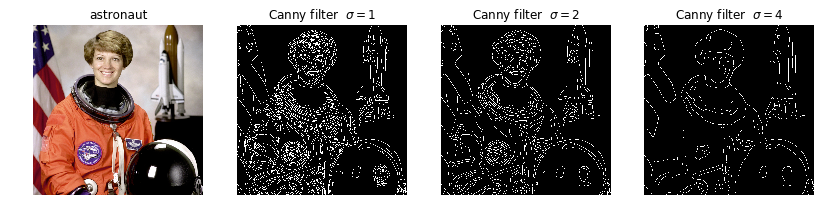

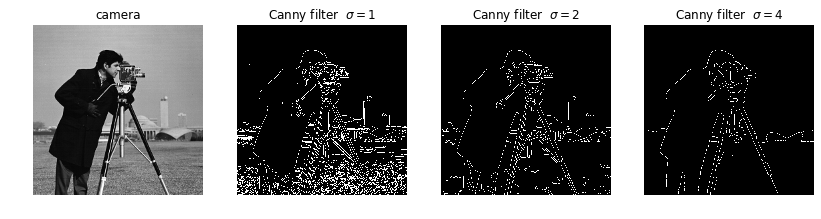

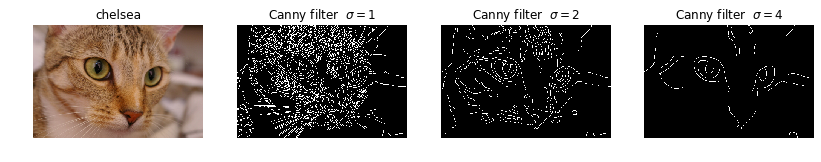

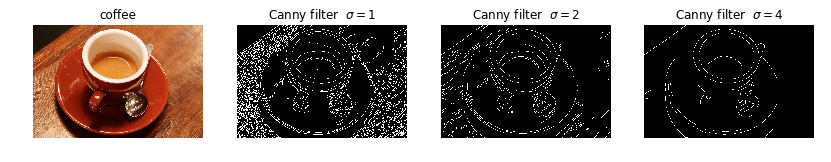

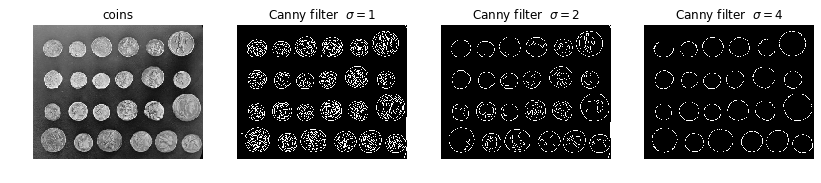

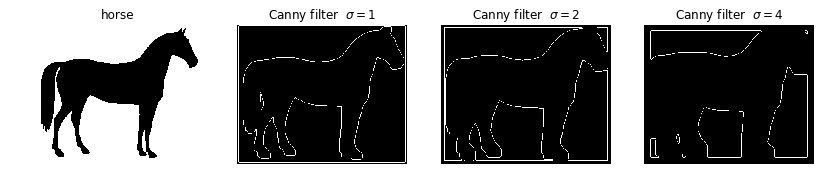

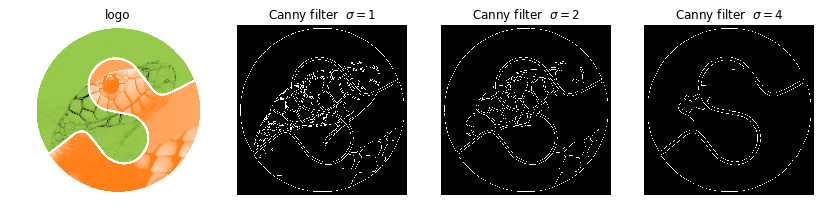

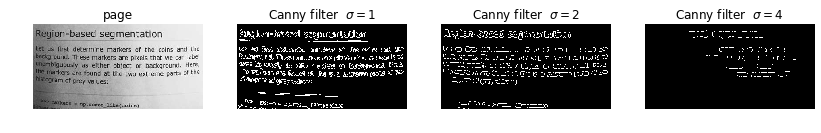

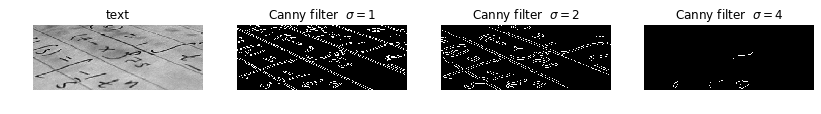

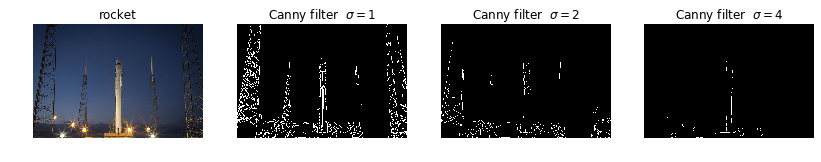

In [23]:
matplotlib.rcParams['font.size'] = 10

images = ('astronaut',
          'camera',
          'chelsea',
          'coffee',
          'coins',
          'horse',
          'logo',
          'page',
          'text',
          'rocket',
          )
def plot_canny_filter(img, gaussian_sigma, ax):
    
    image = img
    # Check if image is RGB and convert to grayscale
    if image.ndim == 3:
          image = rgb2gray(image)

    edges = feature.canny(image, sigma=gaussian_sigma)
    ax.imshow(edges, cmap=plt.cm.gray)
    ax.axis('off')
    ax.set_title("Canny filter  $\sigma={}$".format(gaussian_sigma))

for name in images:
    # Get image with name
    caller = getattr(data, name)
    image = caller()
    
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(14, 12),
                                    sharex=True, sharey=True)
    if image.ndim == 2:
        ax1.imshow(image, cmap=plt.cm.gray)
        ax1.axis('off')
    else:
        ax1.imshow(image)
        ax1.axis('off')
    ax1.set_title(name)
    
    plot_canny_filter(image, 1, ax2)
    plot_canny_filter(image, 2, ax3)
    plot_canny_filter(image, 4, ax4)
    
    plt.show()



### Testing edge detection using test data

In [12]:
# Load test images
file_spec = '*.jpg'
external_drive = 'data'
load_pattern = os.path.join(external_drive, file_spec)
ic = io.imread_collection(load_pattern)
print(ic.files)

['data/tree1.jpg', 'data/tree2.jpg', 'data/tree3.jpg', 'data/tree4.jpg', 'data/tree7.jpg']


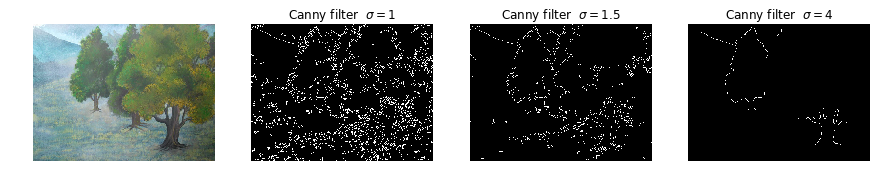

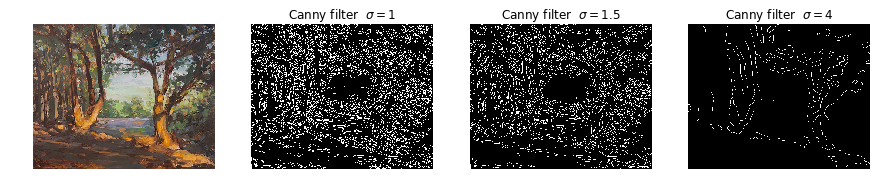

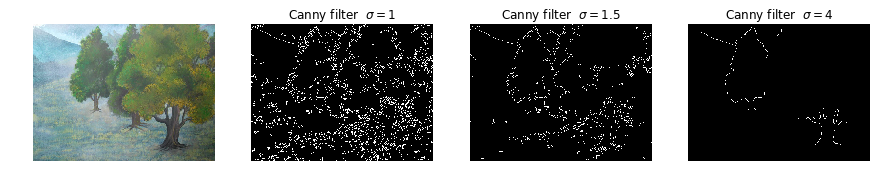

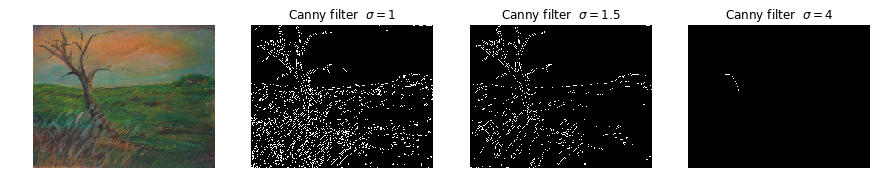

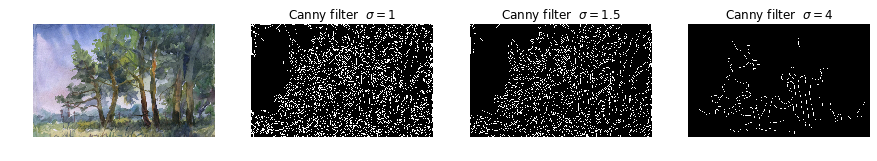

In [19]:
for image in ic:
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(15, 14),
                                    sharex=True, sharey=True)
    if image.ndim == 2:
        ax1.imshow(image, cmap=plt.cm.gray)
        ax1.axis('off')
    else:
        ax1.imshow(image)
        ax1.axis('off')
    ax1.set_title('Original')
    
    plot_canny_filter(image, 1, ax2)
    plot_canny_filter(image, 1.5, ax3)
    plot_canny_filter(image, 4, ax4)
    
    plt.show()
    